In [40]:
import torch
import numpy as np
import seaborn as sns

In [2]:
# create a tensor
x = torch.tensor(5.5)

In [3]:
y = x + 10
print(y)

tensor(15.5000)


In [4]:
print(x.requires_grad)

False


In [5]:
x = torch.tensor(2.0, requires_grad=True)
print(x.requires_grad)

True


In [6]:
def y_function(val):
    return (val-3) * (val-6) * (val-4)

In [7]:
x_range = np.linspace(0, 10, 101)
y_range = [y_function(i) for i in x_range]

<Axes: >

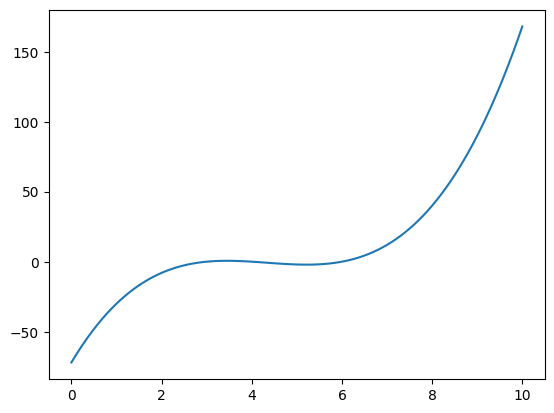

In [9]:
sns.lineplot(x=x_range, y=y_range)

In [10]:
y = (x-3) * (x-6) * (x-4)
y.backward()

In [11]:
print(x.grad)

tensor(14.)


In [15]:
x = torch.tensor(1.0, requires_grad=True)
y = (x**3)
z = 5*y-4
z.backward()
print(x.grad)


tensor(15.)


In [18]:
x11 = torch.tensor(2.0, requires_grad=True)
x21 = torch.tensor(3.0, requires_grad=True)
x21 = 5 * x11 - 3 * x21
x22 = 2 * x11**2 + 2 * x21
y = 4 * x21 + 3 * x22
y.backward()
print(x11.grad)
print(x21.grad)

tensor(74.)
None


C:\Users\Crab_workstation\AppData\Local\Temp\ipykernel_19268\4187630899.py:8: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\cb\pytorch_1000000000000\work\build\aten\src\ATen/core/TensorBody.h:485.)
  print(x21.grad)


In [41]:
## linear regression
import pandas as pd
import torch.nn as nn

In [20]:
cars_file = 'https://gist.githubusercontent.com/noamross/e5d3e859aa0c794be10b/raw/b999fb4425b54c63cab088c0ce2c0d6ce961a563/cars.csv'
cars = pd.read_csv(cars_file)
cars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


<Axes: xlabel='wt', ylabel='mpg'>

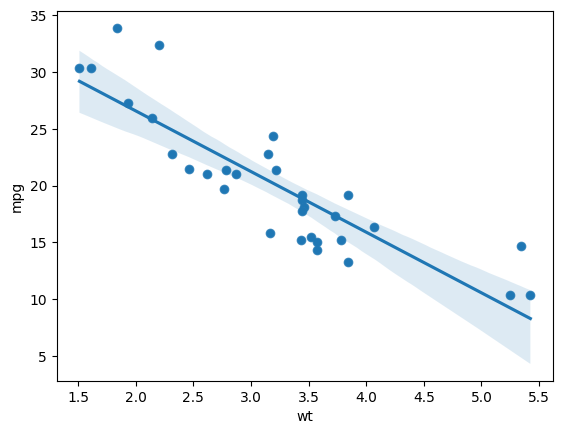

In [22]:
sns.scatterplot(x='wt', y='mpg', data=cars)
sns.regplot(x='wt', y='mpg', data=cars)

In [155]:
X_array = np.array(cars.wt.values, dtype=np.float32).reshape(-1, 1) # this is the shape pytorch expects
Y_array = np.array(cars.mpg.values, dtype=np.float32).reshape(-1, 1)
X = torch.from_numpy(X_array)
Y = torch.from_numpy(Y_array)

(32, 1)


In [143]:
w = torch.rand(1, requires_grad=True, dtype=torch.float32)
b = torch.rand(1, requires_grad=True, dtype=torch.float32)

num_epochs = 1000
learning_rate = 0.001

for epoch in range(num_epochs):
    for i in range(len(X)):
        # forward pass
        y_pred = X[i] * w + b 
        # loss
        loss_tensor = torch.pow(y_pred - Y[i], 2)
        # backward pass
        loss_tensor.backward()
        # extract losses
        loss_value = loss_tensor.data[0]
        # update weights and biases
        with torch.no_grad(): # to make use of calculated gradients stop automatic grads
            w -= w.grad * learning_rate
            b -= b.grad * learning_rate
            w.grad.zero_()
            b.grad.zero_()
            # zeroes gradients for next pass
    if epoch%100==0:
        print('epoch', epoch, 'loss', loss_value)




epoch 0 loss tensor(146.5704)
epoch 100 loss tensor(11.1920)
epoch 200 loss tensor(2.8410)
epoch 300 loss tensor(0.4478)
epoch 400 loss tensor(0.0022)
epoch 500 loss tensor(0.1117)
epoch 600 loss tensor(0.3222)
epoch 700 loss tensor(0.5047)
epoch 800 loss tensor(0.6367)
epoch 900 loss tensor(0.7251)


In [144]:
# set up model class

class LinearRegressionTorch(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionTorch, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        out = self.linear(x)
        return out

In [156]:
input_dim = 1
output_dim = 1
model = LinearRegressionTorch(input_dim, output_dim)

In [157]:
def run_model(X, Y, model, loss, LR = 0.02, NUM_EPOCHS = 1000):
    losses, slope, bias = [], [], []
    optimizer = torch.optim.SGD(model.parameters(), LR) 
    loss_fun = nn.MSELoss()
    NUM_EPOCHS = 1000

    for epoch in range(NUM_EPOCHS):
        # set gradients to zero
        optimizer.zero_grad()
        # forward pass
        y_pred = model(X)
        # compute loss
        loss = loss_fun(y_pred, Y)
        # compute gradients
        loss.backward()
        # update weights
        optimizer.step()
        # get parameters
        for name, param in model.named_parameters():
            if param.requires_grad:
                if name == 'linear.weight':
                    slope.append(param.data.numpy()[0][0])
                if name == 'linear.bias':
                    bias.append(param.data.numpy()[0])
        # store loss
        losses.append(float(loss.data))
        
        if epoch % 100 == 0:
            print('Epoch: {}, Loss: , {:.4f}'.format(epoch, losses[-1]))
    return model, losses, slope, bias
    #return losses[-1], slope[-1], bias[-1]

In [162]:
model, losses, slope, bias = run_model(X, Y, LinearRegressionTorch(input_dim, output_dim), loss_fun, LR = 0.02, NUM_EPOCHS = 1000)

Epoch: 0, Loss: , 333.6557
Epoch: 100, Loss: , 66.1332
Epoch: 200, Loss: , 39.9368
Epoch: 300, Loss: , 25.6886
Epoch: 400, Loss: , 17.9390
Epoch: 500, Loss: , 13.7240
Epoch: 600, Loss: , 11.4314
Epoch: 700, Loss: , 10.1845
Epoch: 800, Loss: , 9.5063
Epoch: 900, Loss: , 9.1374


<Axes: >

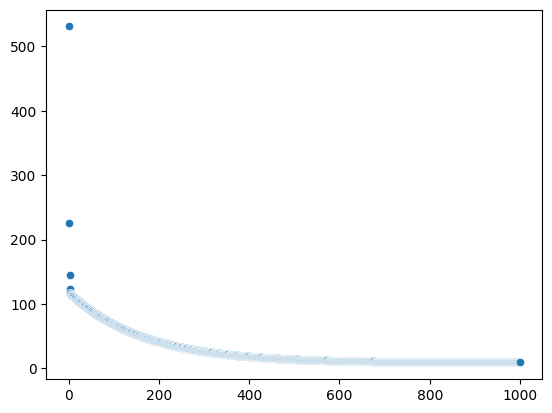

In [159]:
sns.scatterplot(x=range(NUM_EPOCHS), y=losses)

<Axes: >

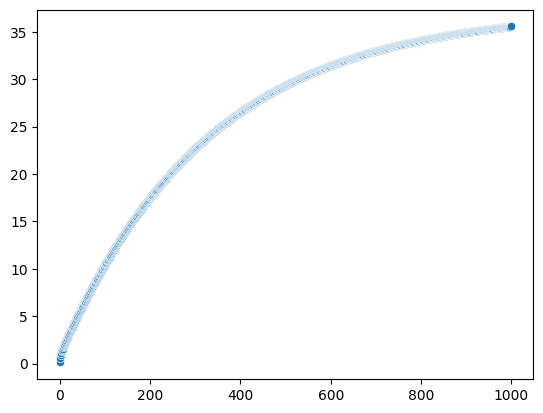

In [160]:
sns.scatterplot(x=range(NUM_EPOCHS), y=bias)

<Axes: >

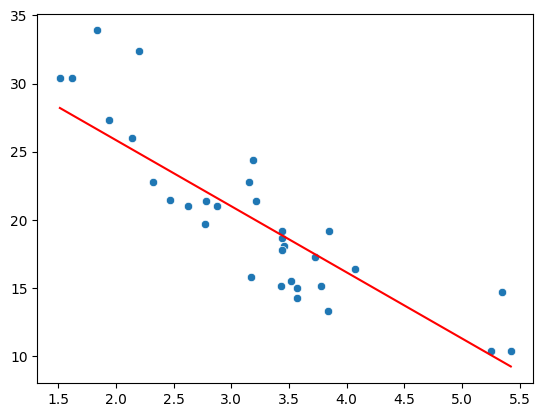

In [161]:
Y = model(X).data.numpy().reshape(-1)
sns.scatterplot(x=X_array.reshape(-1), y=Y_array.reshape(-1))
sns.lineplot(x=X_array.reshape(-1), y=Y, color='red')

In [171]:
loss_end = []
coordinates = []
for NUM_EPOCHS in [100, 1000, 10000, 10000]:
    for LR in [0.02, 0.002, 0.0002]:
        model, losses, slope, bias = run_model(X, Y, LinearRegressionTorch(input_dim, output_dim), loss_fun, LR, NUM_EPOCHS)
        coordinates.append([NUM_EPOCHS, LR])
        loss_end.append(losses[-1])
location = np.argmin(np.array(loss_end))
coordinates[location]

Epoch: 0, Loss: , 470.9553
Epoch: 100, Loss: , 66.8967
Epoch: 200, Loss: , 40.3520
Epoch: 300, Loss: , 25.9144
Epoch: 400, Loss: , 18.0618
Epoch: 500, Loss: , 13.7908
Epoch: 600, Loss: , 11.4678
Epoch: 700, Loss: , 10.2043
Epoch: 800, Loss: , 9.5171
Epoch: 900, Loss: , 9.1433
Epoch: 0, Loss: , 506.4707
Epoch: 100, Loss: , 112.0492
Epoch: 200, Loss: , 105.9347
Epoch: 300, Loss: , 100.1973
Epoch: 400, Loss: , 94.7986
Epoch: 500, Loss: , 89.7183
Epoch: 600, Loss: , 84.9378
Epoch: 700, Loss: , 80.4394
Epoch: 800, Loss: , 76.2064
Epoch: 900, Loss: , 72.2232
Epoch: 0, Loss: , 536.5861
Epoch: 100, Loss: , 275.4561
Epoch: 200, Loss: , 176.8957
Epoch: 300, Loss: , 139.4398
Epoch: 400, Loss: , 124.9526
Epoch: 500, Loss: , 119.1007
Epoch: 600, Loss: , 116.4969
Epoch: 700, Loss: , 115.1162
Epoch: 800, Loss: , 114.1978
Epoch: 900, Loss: , 113.4555
Epoch: 0, Loss: , 406.8215
Epoch: 100, Loss: , 65.3819
Epoch: 200, Loss: , 39.5282
Epoch: 300, Loss: , 25.4663
Epoch: 400, Loss: , 17.8181
Epoch: 500, Lo

[1000, 0.02]

In [176]:
model = LinearRegressionTorch(input_dim, output_dim)
optimizer = torch.optim.SGD(model.parameters(), LR) 
loss_fun = nn.MSELoss()
losses = []
slope, bias = [], []
NUM_EPOCHS = 1000
BATCH_SIZE = 2
for epoch in range(NUM_EPOCHS):
    # pass training data bite by bite
    for i in range(0, len(X), BATCH_SIZE):
        # set gradients to zero
        optimizer.zero_grad()

        # forward pass
        y_pred = model(X[i:i+BATCH_SIZE])

        # calculate loss
        loss = loss_fun(y_pred, Y[i:i+BATCH_SIZE])
        loss.backward()

        # update parameters
        optimizer.step()

        # get parameters
        for name, param in model.named_parameters():
            if param.requires_grad:
                if name == 'linear.weight':
                    slope.append(param.data.numpy()[0][0])
                if name == 'linear.bias':
                    bias.append(param.data.numpy()[0])


        # store loss
        losses.append(float(loss.data))
        # print loss
        if (epoch % 100 == 0):
            print(f"Epoch {epoch}, Loss: {loss.data}")

Epoch 0, Loss: 445.4168701171875
Epoch 0, Loss: 490.3416748046875
Epoch 0, Loss: 335.81109619140625
Epoch 0, Loss: 393.64398193359375
Epoch 0, Loss: 433.7606201171875
Epoch 0, Loss: 279.1486511230469
Epoch 0, Loss: 248.88589477539062
Epoch 0, Loss: 90.59919738769531
Epoch 0, Loss: 606.5505981445312
Epoch 0, Loss: 1014.4935913085938
Epoch 0, Loss: 326.3245544433594
Epoch 0, Loss: 177.89968872070312
Epoch 0, Loss: 522.1889038085938
Epoch 0, Loss: 769.2457275390625
Epoch 0, Loss: 285.1139831542969
Epoch 0, Loss: 302.77984619140625
Epoch 100, Loss: 32.03569793701172
Epoch 100, Loss: 51.20573043823242
Epoch 100, Loss: 0.14914022386074066
Epoch 100, Loss: 36.07057571411133
Epoch 100, Loss: 15.7625150680542
Epoch 100, Loss: 12.712236404418945
Epoch 100, Loss: 15.028675079345703
Epoch 100, Loss: 277.11328125
Epoch 100, Loss: 265.36944580078125
Epoch 100, Loss: 460.819580078125
Epoch 100, Loss: 33.034236907958984
Epoch 100, Loss: 29.100303649902344
Epoch 100, Loss: 122.49417114257812
Epoch 100,

In [181]:
from torch.utils.data import Dataset, DataLoader

In [190]:
# create dataset and dataloader

class LinearRegressionDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [191]:
train_loader = DataLoader(dataset = LinearRegressionDataset(X_array, Y_array), batch_size=2)

In [193]:
[i for i in enumerate(train_loader)]

[(0,
  [tensor([[2.6200],
           [2.8750]]),
   tensor([[21.],
           [21.]])]),
 (1,
  [tensor([[2.3200],
           [3.2150]]),
   tensor([[22.8000],
           [21.4000]])]),
 (2,
  [tensor([[3.4400],
           [3.4600]]),
   tensor([[18.7000],
           [18.1000]])]),
 (3,
  [tensor([[3.5700],
           [3.1900]]),
   tensor([[14.3000],
           [24.4000]])]),
 (4,
  [tensor([[3.1500],
           [3.4400]]),
   tensor([[22.8000],
           [19.2000]])]),
 (5,
  [tensor([[3.4400],
           [4.0700]]),
   tensor([[17.8000],
           [16.4000]])]),
 (6,
  [tensor([[3.7300],
           [3.7800]]),
   tensor([[17.3000],
           [15.2000]])]),
 (7,
  [tensor([[5.2500],
           [5.4240]]),
   tensor([[10.4000],
           [10.4000]])]),
 (8,
  [tensor([[5.3450],
           [2.2000]]),
   tensor([[14.7000],
           [32.4000]])]),
 (9,
  [tensor([[1.6150],
           [1.8350]]),
   tensor([[30.4000],
           [33.9000]])]),
 (10,
  [tensor([[2.4650],
           

In [198]:
model = LinearRegressionTorch(input_dim, output_dim)
optimizer = torch.optim.SGD(model.parameters(), 0.02) 
loss_fun = nn.MSELoss()
losses = []
slope, bias = [], []
NUM_EPOCHS = 1000
BATCH_SIZE = 2
for epoch in range(NUM_EPOCHS):
    # pass training data bite by bite
    for batch, (X, Y) in enumerate(train_loader):
        # set gradients to zero
        optimizer.zero_grad()

        # forward pass
        y_pred = model(X)

        # calculate loss
        loss = loss_fun(y_pred, Y)
        loss.backward()

        # update parameters
        optimizer.step()

        # get parameters
    for name, param in model.named_parameters():
        if param.requires_grad:
            if name == 'linear.weight':
                slope.append(param.data.numpy()[0][0])
            if name == 'linear.bias':
                bias.append(param.data.numpy()[0])


    # store loss
    losses.append(float(loss.data))
    # print loss
    if (epoch % 100 == 0):
        print(f"Epoch {epoch}, Loss: {loss.data}")

Epoch 0, Loss: 35.1898307800293
Epoch 100, Loss: 1.5670485496520996
Epoch 200, Loss: 1.4115256071090698
Epoch 300, Loss: 1.4094297885894775
Epoch 400, Loss: 1.409427285194397
Epoch 500, Loss: 1.409427285194397
Epoch 600, Loss: 1.409427285194397
Epoch 700, Loss: 1.409427285194397
Epoch 800, Loss: 1.409427285194397
Epoch 900, Loss: 1.409427285194397


<Axes: >

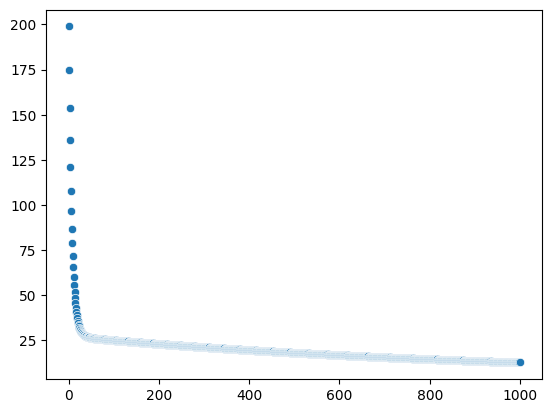

In [197]:
sns.scatterplot(x=range(len(losses)), y=losses)

In [199]:
# model state dict
model.state_dict()

OrderedDict([('linear.weight', tensor([[-5.7225]])),
             ('linear.bias', tensor([36.6935]))])

In [200]:
# model save state
torch.save(model.state_dict(), 'model_state_dict.pth')

In [201]:
model = LinearRegressionTorch(input_dim, output_dim)
model.load_state_dict(torch.load('model_state_dict.pth'))

<All keys matched successfully>

In [202]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[-5.7225]])),
             ('linear.bias', tensor([36.6935]))])

In [205]:
# hyperparameter tuning: number of nodes, layer types, activation functions, loss, optimizer, LR, # epochs

from skorch import NeuralNetRegressor
from sklearn.model_selection import GridSearchCV

In [228]:
net = NeuralNetRegressor(
    LinearRegressionTorch(input_dim, output_dim),
    max_epochs=100,
    lr=LR,
    iterator_train__shuffle=True
)


In [229]:
params = {
    'lr': [0.02, 0.05, 0.08],
    'max_epochs': [10, 200, 500],
}

In [230]:
gs = GridSearchCV(net, params, scoring='r2', cv=3, verbose=2)

In [231]:
X = torch.from_numpy(X_array)
Y = torch.from_numpy(Y_array)
gs.fit(X, Y)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1      461.1663       25.6051  0.0030
      2      267.0924       57.8311  0.0020
      3      197.8834      109.9130  0.0030
      4      172.7277      151.8386  0.0020
      5      163.1180      180.0372  0.0020
      6      158.9982      197.3982  0.0020
      7      156.8206      207.3951  0.0020
      8      155.3338      212.7041  0.0020
      9      154.0963      215.1277  0.0020
     10      152.9523      215.8090  0.0030
[CV] END .............................lr=0.02, max_epochs=10; total time=   0.0s
  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1      351.7598      157.7847  0.0010
      2      160.4219       80.2391  0.0020
      3       99.1847       49.5247  0.0020
      4       79.4894       36.3310  0.0030
      5       73.0591       30.1803  0.0020
      6       70.8648  

c:\Users\Crab_workstation\anaconda3\envs\segmentation\lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


     49       46.3002       39.5681  0.0030
     50       45.2757       38.0443  0.0020
     51       44.2830       36.5745  0.0020
     52       43.3211       35.1567  0.0020
     53       42.3890       33.7894  0.0050
     54       41.4858       32.4707  0.0040
     55       40.6106       31.1992  0.0020
     56       39.7626       29.9733  0.0040
     57       38.9409       28.7914  0.0040
     58       38.1446       27.6521  0.0040
     59       37.3730       26.5540  0.0020
     60       36.6254       25.4957  0.0040
     61       35.9009       24.4758  0.0020
     62       35.1990       23.4932  0.0020
     63       34.5187       22.5466  0.0020
     64       33.8596       21.6347  0.0040
     65       33.2209       20.7564  0.0030
     66       32.6021       19.9106  0.0010
     67       32.0024       19.0961  0.0020
     68       31.4213       18.3120  0.0020
     69       30.8582       17.5572  0.0020
     70       30.3126       16.8307  0.0020
     71       29.7839       16.1

c:\Users\Crab_workstation\anaconda3\envs\segmentation\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Crab_workstation\anaconda3\envs\segmentation\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\Crab_workstation\anaconda3\envs\segmentation\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\Users\Crab_workstation\anaconda3\envs\segmentation\lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "c:\Users\Crab_workstation\anaconda3\envs\segmentation\lib\site-packages\sklearn\utils\_param_validation.py", line 

     42       72.8523       14.4946  0.0020
     43       71.7375       14.2108  0.0020
     44       70.6423       13.9331  0.0010
     45       69.5666       13.6614  0.0020
     46       68.5099       13.3955  0.0050
     47       67.4720       13.1353  0.0030
     48       66.4524       12.8807  0.0020
     49       65.4508       12.6316  0.0020
     50       64.4670       12.3879  0.0020
     51       63.5006       12.1495  0.0020
     52       62.5513       11.9163  0.0020
     53       61.6189       11.6882  0.0020
     54       60.7029       11.4650  0.0010
     55       59.8032       11.2468  0.0020
     56       58.9194       11.0333  0.0020
     57       58.0512       10.8246  0.0020
     58       57.1984       10.6204  0.0020
     59       56.3607       10.4208  0.0020
     60       55.5379       10.2256  0.0020
     61       54.7296       10.0348  0.0010
     62       53.9356        9.8482  0.0010
     63       53.1557        9.6658  0.0010
     64       52.3896        9.4

GridSearchCV(cv=3,
             estimator=<class 'skorch.regressor.NeuralNetRegressor'>[uninitialized](
  module=LinearRegressionTorch(
    (linear): Linear(in_features=1, out_features=1, bias=True)
  ),
),
             param_grid={'lr': [0.02, 0.05, 0.08],
                         'max_epochs': [10, 200, 500]},
             scoring='r2', verbose=2)

In [232]:
print(f"best score: {gs.best_score_}, best params: {gs.best_params_}")

best score: 0.569556591603651, best params: {'lr': 0.05, 'max_epochs': 500}
